In [1]:
from pathlib import Path
import sys, os
absolute_path = Path().absolute()
sys.path.append(str(absolute_path.parents[0]))
from enveco.data.image import *
from enveco.data.las import *

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import numpy as np

/home/mayrajeo/miniconda3/envs/enveco/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729062494/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
data_path = Path('../../enveco_data/enveco/')
train = pd.read_csv(data_path/'AV.leaf.on.train.csv')
train = train.rename(columns = lambda x: re.sub('[\.]+', '_', x))
val = pd.read_csv(data_path/'AV.leaf.on.val.csv')
val = val.rename(columns = lambda x: re.sub('[\.]+', '_', x))
test = pd.read_csv(data_path/'AV.leaf.on.test.csv')
test = test.rename(columns = lambda x: re.sub('[\.]+', '_', x))

In [3]:
needed_cols = ['sampleplotid', 'x', 'y', 'g', 'd', 'h', 'v', 'v_ma', 'v_ku', 'v_lp']

train = train[needed_cols]
test = test[needed_cols]
val = val[needed_cols]

Add pine, spruce and broadleaf pcts

In [4]:
train['pct_ma'] = train.v_ma/train.v
val['pct_ma'] = val.v_ma/val.v
test['pct_ma'] = test.v_ma/test.v

train['pct_ku'] = train.v_ku/train.v
val['pct_ku'] = val.v_ku/val.v
test['pct_ku'] = test.v_ku/test.v

train['pct_lp'] = train.v_lp/train.v
val['pct_lp'] = val.v_lp/val.v
test['pct_lp'] = test.v_lp/test.v

Number of species with at least 5% present in plots

In [5]:
train['pine_present'] = train.apply(lambda row: 1 if row.v_ma >= 0.05 else 0, axis=1)
train['spruce_present'] = train.apply(lambda row: 1 if row.v_ku >= 0.05 else 0, axis=1)
train['broadleaf_present'] = train.apply(lambda row: 1 if row.v_lp >= 0.05 else 0, axis=1)

In [6]:
val['pine_present'] = val.apply(lambda row: 1 if row.v_ma >= 0.05 else 0, axis=1)
val['spruce_present'] = val.apply(lambda row: 1 if row.v_ku >= 0.05 else 0, axis=1)
val['broadleaf_present'] = val.apply(lambda row: 1 if row.v_lp >= 0.05 else 0, axis=1)

In [7]:
test['pine_present'] = test.apply(lambda row: 1 if row.v_ma >= 0.05 else 0, axis=1)
test['spruce_present'] = test.apply(lambda row: 1 if row.v_ku >= 0.05 else 0, axis=1)
test['broadleaf_present'] = test.apply(lambda row: 1 if row.v_lp >= 0.05 else 0, axis=1)

In [8]:
train[['pine_present', 'spruce_present', 'broadleaf_present']].T.dot(train[['pine_present', 'spruce_present', 'broadleaf_present']])

,pine_present,spruce_present,broadleaf_present
pine_present,950,648,789
spruce_present,648,733,667
broadleaf_present,789,667,876


Majority species.

In [9]:
def maj_species(row):
    vals = [row.pct_ma, row.pct_ku, row.pct_lp]
    species = ['Pine', 'Spruce', 'Broadleaved']
    return species[vals.index(max(vals))]

In [10]:
train['dominant_species'] = train.apply(lambda row: maj_species(row), axis=1)
val['dominant_species'] = val.apply(lambda row: maj_species(row), axis=1)
test['dominant_species'] = test.apply(lambda row: maj_species(row), axis=1)

# Distributions of target variables

Compare species-wise distributions by percentage

Train

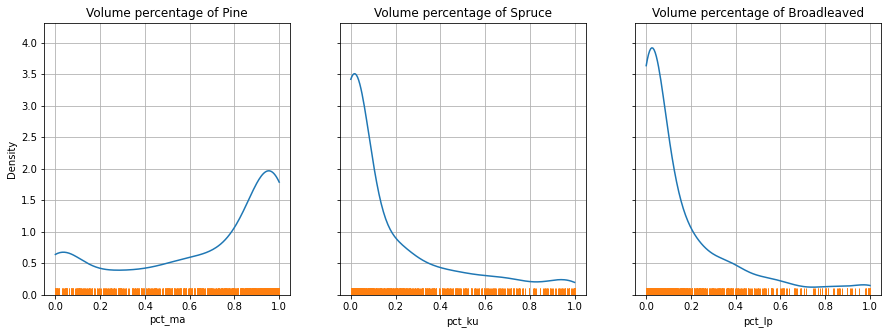

In [11]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

for a in axs: a.grid()
    
sns.kdeplot(train.pct_ma, ax=axs[0], cut=0)
sns.rugplot(train.pct_ma, ax=axs[0])
axs[0].set_title('Volume percentage of Pine')

sns.kdeplot(train.pct_ku, ax=axs[1], cut=0)
sns.rugplot(train.pct_ku, ax=axs[1])
axs[1].set_title('Volume percentage of Spruce')

sns.kdeplot(train.pct_lp, ax=axs[2], cut=0)
sns.rugplot(train.pct_lp, ax=axs[2])
axs[2].set_title('Volume percentage of Broadleaved')
plt.show()

Valid

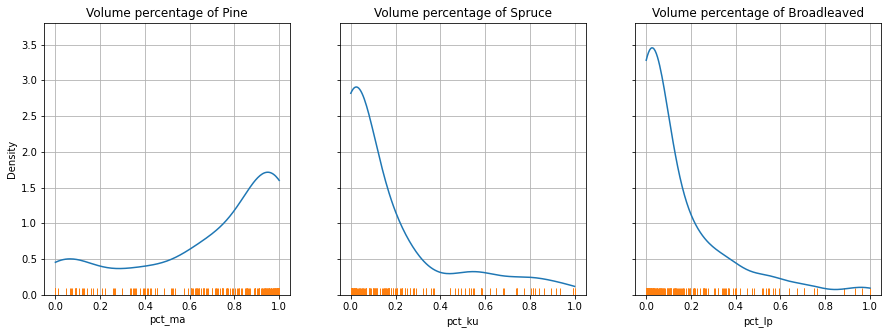

In [12]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

for a in axs: a.grid()
    
sns.kdeplot(val.pct_ma, ax=axs[0], cut=0)
sns.rugplot(val.pct_ma, ax=axs[0])
axs[0].set_title('Volume percentage of Pine')

sns.kdeplot(val.pct_ku, ax=axs[1], cut=0)
sns.rugplot(val.pct_ku, ax=axs[1])
axs[1].set_title('Volume percentage of Spruce')

sns.kdeplot(val.pct_lp, ax=axs[2], cut=0)
sns.rugplot(val.pct_lp, ax=axs[2])
axs[2].set_title('Volume percentage of Broadleaved')
plt.show()

Test

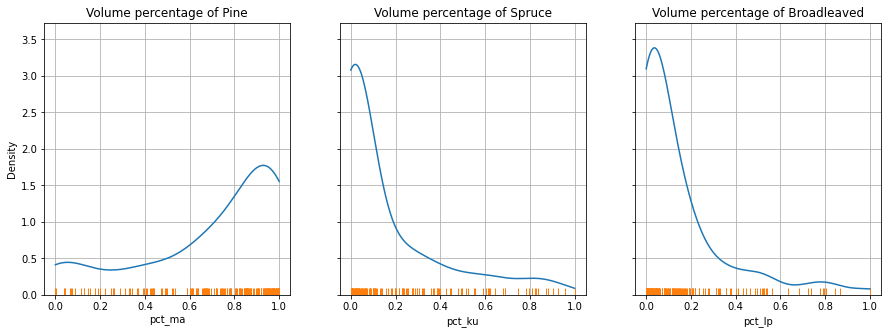

In [13]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

for a in axs: a.grid()
    
sns.kdeplot(test.pct_ma, ax=axs[0], cut=0)
sns.rugplot(test.pct_ma, ax=axs[0])
axs[0].set_title('Volume percentage of Pine')

sns.kdeplot(test.pct_ku, ax=axs[1], cut=0)
sns.rugplot(test.pct_ku, ax=axs[1])
axs[1].set_title('Volume percentage of Spruce')

sns.kdeplot(test.pct_lp, ax=axs[2], cut=0)
sns.rugplot(test.pct_lp, ax=axs[2])
axs[2].set_title('Volume percentage of Broadleaved')
plt.show()

Distribution differences for different datasets

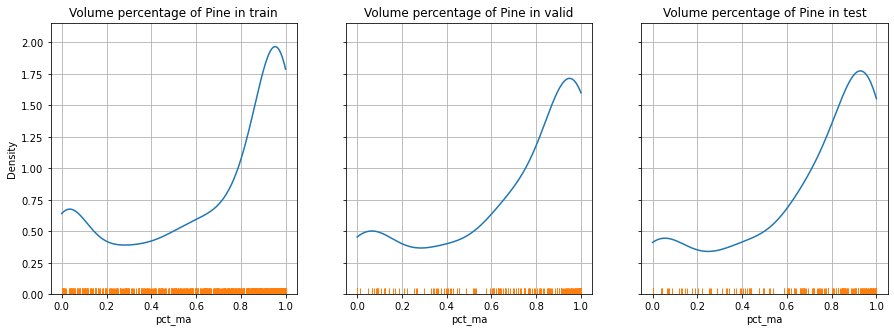

In [14]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

for a in axs: a.grid()
    
sns.kdeplot(train.pct_ma, ax=axs[0], cut=0)
sns.rugplot(train.pct_ma, ax=axs[0])
axs[0].set_title('Volume percentage of Pine in train')

sns.kdeplot(val.pct_ma, ax=axs[1], cut=0)
sns.rugplot(val.pct_ma, ax=axs[1])
axs[1].set_title('Volume percentage of Pine in valid')

sns.kdeplot(test.pct_ma, ax=axs[2], cut=0)
sns.rugplot(test.pct_ma, ax=axs[2])
axs[2].set_title('Volume percentage of Pine in test')
plt.show()

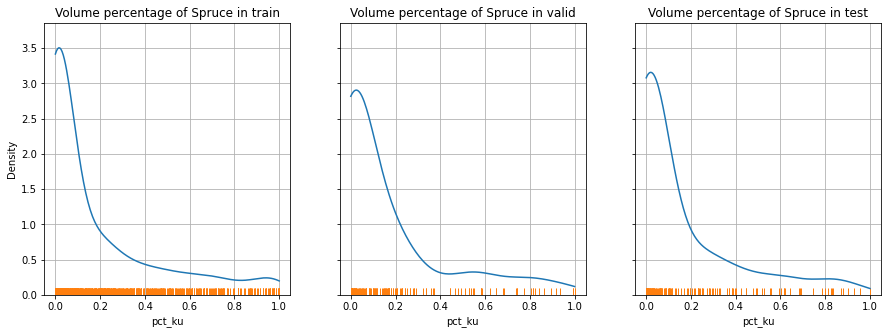

In [15]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

for a in axs: a.grid()
    
sns.kdeplot(train.pct_ku, ax=axs[0], cut=0)
sns.rugplot(train.pct_ku, ax=axs[0])
axs[0].set_title('Volume percentage of Spruce in train')

sns.kdeplot(val.pct_ku, ax=axs[1], cut=0)
sns.rugplot(val.pct_ku, ax=axs[1])
axs[1].set_title('Volume percentage of Spruce in valid')

sns.kdeplot(test.pct_ku, ax=axs[2], cut=0)
sns.rugplot(test.pct_ku, ax=axs[2])
axs[2].set_title('Volume percentage of Spruce in test')
plt.show()

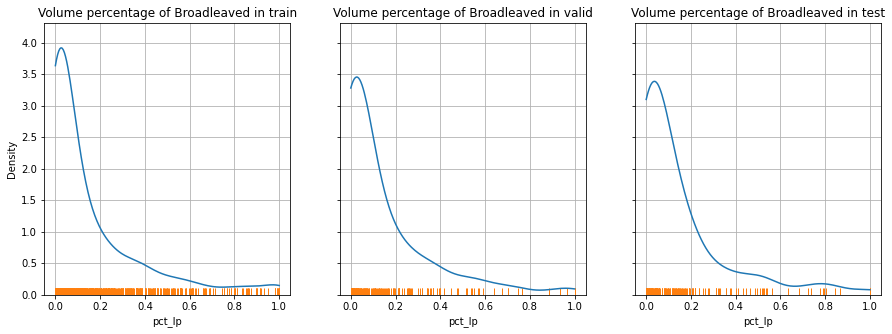

In [16]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

for a in axs: a.grid()
    
sns.kdeplot(train.pct_lp, ax=axs[0], cut=0)
sns.rugplot(train.pct_lp, ax=axs[0])
axs[0].set_title('Volume percentage of Broadleaved in train')

sns.kdeplot(val.pct_lp, ax=axs[1], cut=0)
sns.rugplot(val.pct_lp, ax=axs[1])
axs[1].set_title('Volume percentage of Broadleaved in valid')

sns.kdeplot(test.pct_lp, ax=axs[2], cut=0)
sns.rugplot(test.pct_lp, ax=axs[2])
axs[2].set_title('Volume percentage of Broadleaved in test')
plt.show()

Height

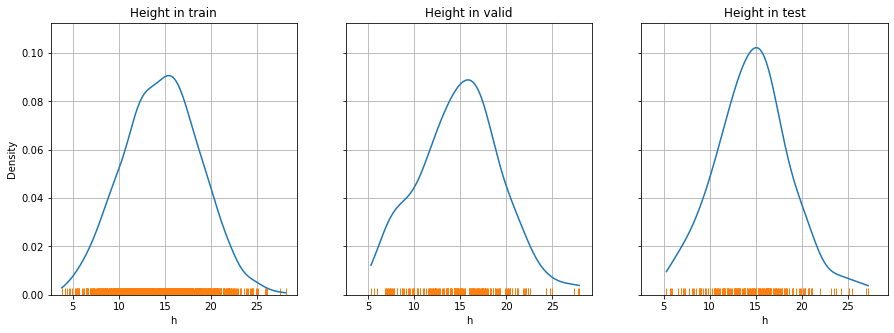

In [17]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True, sharex=True)

for a in axs: a.grid()
    
sns.kdeplot(train.h, ax=axs[0], cut=0)
sns.rugplot(train.h, ax=axs[0])
axs[0].set_title('Height in train')

sns.kdeplot(val.h, ax=axs[1], cut=0)
sns.rugplot(val.h, ax=axs[1])
axs[1].set_title('Height in valid')

sns.kdeplot(test.h, ax=axs[2], cut=0)
sns.rugplot(test.h, ax=axs[2])
axs[2].set_title('Height in test')
plt.show()

Basal area

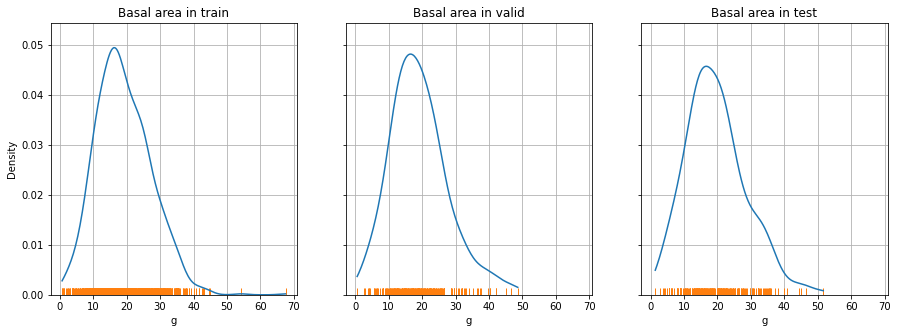

In [18]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True, sharex=True)

for a in axs: a.grid()
    
sns.kdeplot(train.g, ax=axs[0], cut=0)
sns.rugplot(train.g, ax=axs[0])
axs[0].set_title('Basal area in train')

sns.kdeplot(val.g, ax=axs[1], cut=0)
sns.rugplot(val.g, ax=axs[1])
axs[1].set_title('Basal area in valid')

sns.kdeplot(test.g, ax=axs[2], cut=0)
sns.rugplot(test.g, ax=axs[2])
axs[2].set_title('Basal area in test')
plt.show()

DBH

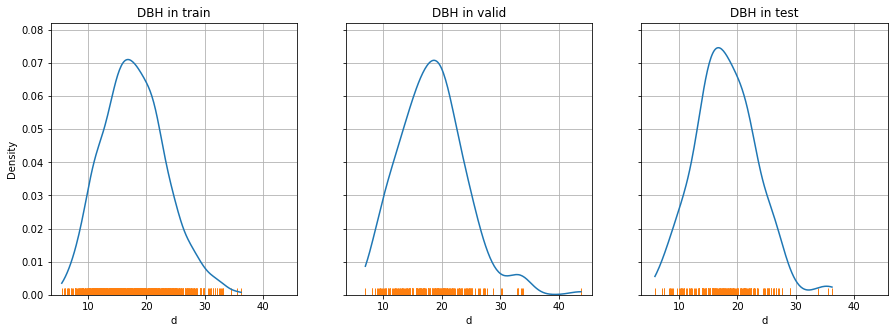

In [19]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True, sharex=True)

for a in axs: a.grid()
    
sns.kdeplot(train.d, ax=axs[0], cut=0)
sns.rugplot(train.d, ax=axs[0])
axs[0].set_title('DBH in train')

sns.kdeplot(val.d, ax=axs[1], cut=0)
sns.rugplot(val.d, ax=axs[1])
axs[1].set_title('DBH in valid')

sns.kdeplot(test.d, ax=axs[2], cut=0)
sns.rugplot(test.d, ax=axs[2])
axs[2].set_title('DBH in test')
plt.show()

Total volume

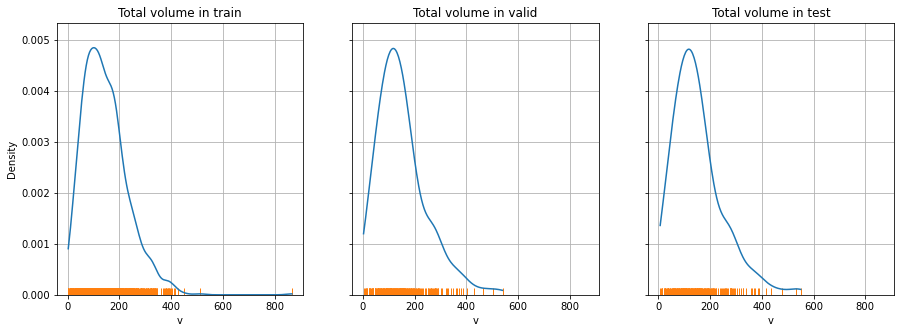

In [20]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True, sharex=True)

for a in axs: a.grid()
    
sns.kdeplot(train.v, ax=axs[0], cut=0)
sns.rugplot(train.v, ax=axs[0])
axs[0].set_title('Total volume in train')

sns.kdeplot(val.v, ax=axs[1], cut=0)
sns.rugplot(val.v, ax=axs[1])
axs[1].set_title('Total volume in valid')

sns.kdeplot(test.v, ax=axs[2], cut=0)
sns.rugplot(test.v, ax=axs[2])
axs[2].set_title('Total volume in test')
plt.show()

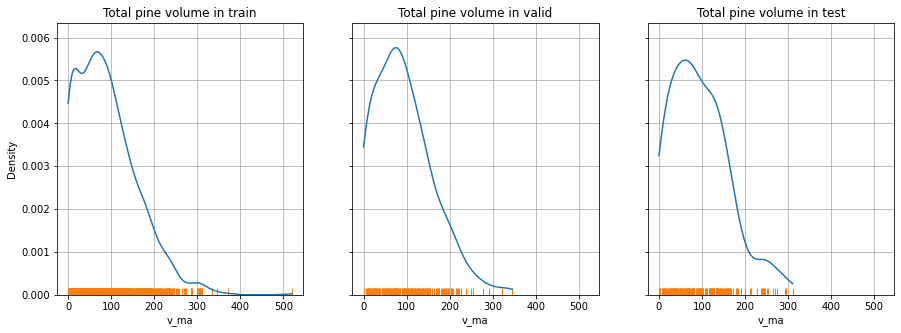

In [21]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True, sharex=True)

for a in axs: a.grid()
    
sns.kdeplot(train.v_ma, ax=axs[0], cut=0)
sns.rugplot(train.v_ma, ax=axs[0])
axs[0].set_title('Total pine volume in train')

sns.kdeplot(val.v_ma, ax=axs[1], cut=0)
sns.rugplot(val.v_ma, ax=axs[1])
axs[1].set_title('Total pine volume in valid')

sns.kdeplot(test.v_ma, ax=axs[2], cut=0)
sns.rugplot(test.v_ma, ax=axs[2])
axs[2].set_title('Total pine volume in test')
plt.show()

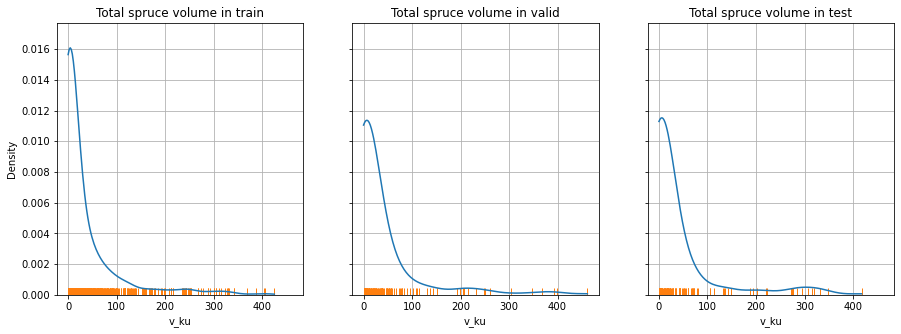

In [22]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True, sharex=True)

for a in axs: a.grid()
    
sns.kdeplot(train.v_ku, ax=axs[0], cut=0)
sns.rugplot(train.v_ku, ax=axs[0])
axs[0].set_title('Total spruce volume in train')

sns.kdeplot(val.v_ku, ax=axs[1], cut=0)
sns.rugplot(val.v_ku, ax=axs[1])
axs[1].set_title('Total spruce volume in valid')

sns.kdeplot(test.v_ku, ax=axs[2], cut=0)
sns.rugplot(test.v_ku, ax=axs[2])
axs[2].set_title('Total spruce volume in test')
plt.show()

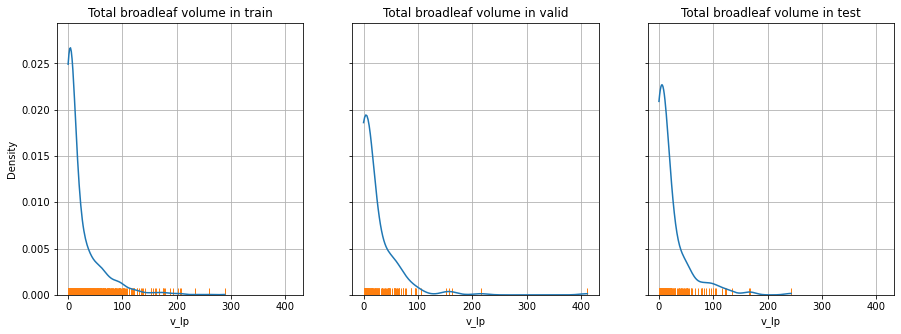

In [23]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True, sharex=True)

for a in axs: a.grid()
    
sns.kdeplot(train.v_lp, ax=axs[0], cut=0)
sns.rugplot(train.v_lp, ax=axs[0])
axs[0].set_title('Total broadleaf volume in train')

sns.kdeplot(val.v_lp, ax=axs[1], cut=0)
sns.rugplot(val.v_lp, ax=axs[1])
axs[1].set_title('Total broadleaf volume in valid')

sns.kdeplot(test.v_lp, ax=axs[2], cut=0)
sns.rugplot(test.v_lp, ax=axs[2])
axs[2].set_title('Total broadleaf volume in test')
plt.show()

In [24]:
train.dominant_species.value_counts(9)

Pine           0.727011
Spruce         0.162835
Broadleaved    0.110153
Name: dominant_species, dtype: float64

In [25]:
val.dominant_species.value_counts(9)

Pine           0.751111
Spruce         0.151111
Broadleaved    0.097778
Name: dominant_species, dtype: float64

In [26]:
test.dominant_species.value_counts(9)

Pine           0.768889
Spruce         0.128889
Broadleaved    0.102222
Name: dominant_species, dtype: float64

Maybe try to predict proportions as classification categories?

<AxesSubplot:>

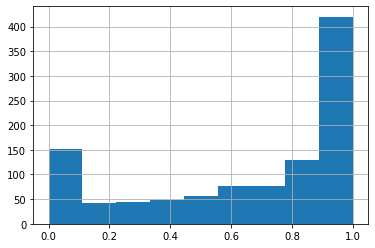

In [27]:
train.pct_ma.hist(bins=np.linspace(0,1,10))

<AxesSubplot:>

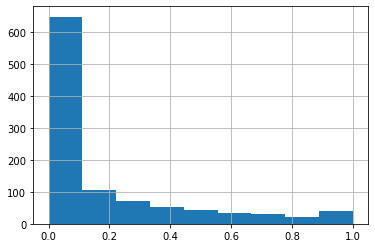

In [28]:
train.pct_ku.hist(bins=np.linspace(0,1,10))

<AxesSubplot:>

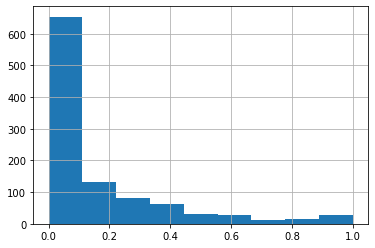

In [29]:
train.pct_lp.hist(bins=np.linspace(0,1,10))

# 